This problem was asked by Uber.

Given an array of integers, return a new array such that each element at index i of the new array is the product of all the numbers in the original array except the one at i.

For example, if our input was [1, 2, 3, 4, 5], the expected output would be [120, 60, 40, 30, 24]. If our input was [3, 2, 1], the expected output would be [2, 3, 6].

Follow-up: what if you can't use division?

In [249]:
import numpy as np

def leave_one_out_multiplication(arr):
    """ Implementation with division and importing numpy """
    return np.prod(arr)/arr # O(n)

def leave_one_out_multiplication_manual(arr):
    """ Implementation with division """
    prod = 1
    for elm in arr: # O(n)
        prod *= elm
    return [prod/elm for elm in arr] # O(n)

def leave_one_out_multiplication_without_dividing(arr):
    """ Implementation without division. Time complexity is O(n) """
    n = len(arr)
    
    # initialise output
    products = [1] * n # O(n)
    
    # multiply by elements strictly below i (going up)
    prod = 1
    for i in range(0,n): # O(n)
        products[i] = prod
        prod *= arr[i]
    
    # multiply by elements strictly above i (going down)
    prod = 1
    for i in reversed(range(0,n)): # O(n)
        products[i] *= prod
        prod *= arr[i]
    
    return products

def leave_one_out_multiplication_without_dividing_slow(arr):
    """ Implementation without division. Time complexity is O(n^2) """
    arr_out = np.array([1] * len(arr)) # O(n)
    for i, elm in enumerate(arr): # O(n^2)
        ind_subset = np.arange(len(arr_out)) != i
        arr_out[ind_subset] *= elm
    return arr_out

In [250]:
integers=[1,2,3,4,5]
print(integers)
print(leave_one_out_multiplication(integers))
print(leave_one_out_multiplication_manual(integers))
print(leave_one_out_multiplication_without_dividing(integers))

integers=[3,2,1]
print('\n')
print(integers)
print(leave_one_out_multiplication(integers))
print(leave_one_out_multiplication_manual(integers))
print(leave_one_out_multiplication_without_dividing(integers))

[1, 2, 3, 4, 5]
[120.  60.  40.  30.  24.]
[120.0, 60.0, 40.0, 30.0, 24.0]
[120, 60, 40, 30, 24]


[3, 2, 1]
[2. 3. 6.]
[2.0, 3.0, 6.0]
[2, 3, 6]


Now I'd like to run some complexity measurements

In [251]:
from timeit import default_timer as timer
import pandas as pd
import math

def runtime(fun, arr):
    """ Return the execution time of fun with argument arr """
    start = timer()
#     print(fun(arr))
    fun(arr)
    end = timer()
    return end-start

def benchmark(fun, min_array_len=10, max_array_len=1e4, n=20):
    """ 
    Benchmark runtime of function fun with arrays of varying length. 
    Return a DataFrame specifying execution times in seconds for a
    set of array lengths.
    """
    bench_df = pd.DataFrame({
        'len': np.logspace(
            math.log10(min_array_len),
            math.log10(max_array_len),
            num=n,
            dtype=np.int32
        ),
        'execution_time': np.empty(n)
    })
    for i, n in enumerate(bench_df['len']):
#         arr = np.arange(1,n) # this leads to float64 overflow
        arr = np.repeat(1,repeats=n)
        bench_df.at[i, 'execution_time'] = runtime(fun,arr)
    return bench_df

In [252]:
leaveOneOut_stats_df = benchmark(leave_one_out_multiplication, max_array_len=1e6)

In [253]:
leaveOneOutManual_stats_df = benchmark(leave_one_out_multiplication_manual, max_array_len=1e6)

In [254]:
leaveOneOutNoDivide_stats_df = benchmark(leave_one_out_multiplication_without_dividing, max_array_len=1e6)

Text(0.5, 1.0, 'without division - lists')

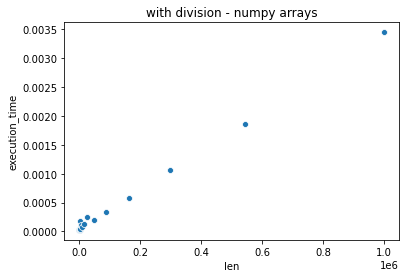

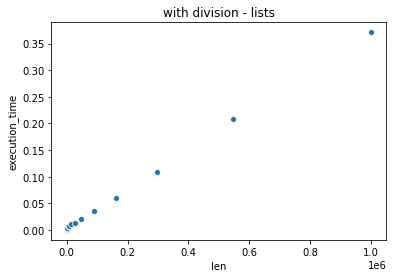

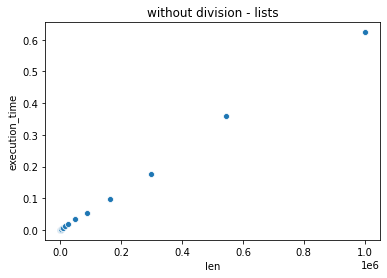

In [255]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.scatterplot('len', 'execution_time', data=leaveOneOut_stats_df, ax=ax)
ax.set_title('with division - numpy arrays')

fig, ax = plt.subplots()
sns.scatterplot('len', 'execution_time', data=leaveOneOutManual_stats_df, ax=ax)
ax.set_title('with division - lists')

fig, ax = plt.subplots()
sns.scatterplot('len', 'execution_time', data=leaveOneOutNoDivide_stats_df, ax=ax)
ax.set_title('without division - lists')

Print package versions

In [256]:
import pkg_resources
packages=['numpy', 'pandas', 'matplotlib', 'seaborn']
for m in pkg_resources.working_set:
    if m.project_name.lower() in packages:
        print(f"{m.project_name}=={m.version}")

seaborn==0.10.1
pandas==1.0.4
numpy==1.18.1
matplotlib==3.2.1
